# **Histogram of Gray Image**

**image.flatten()** converts the image into a 1D array (a flat array) from its original 2D shape (height x width). This is done because histograms are usually computed on 1D arrays of pixel intensities.

**bins=256:** This means the histogram will have 256 bins or classes, corresponding to the 256 possible intensity levels for an 8-bit grayscale image (from 0 to 255).

**range=[0, 256]:** This sets the range of values to consider for the histogram (0 to 255)

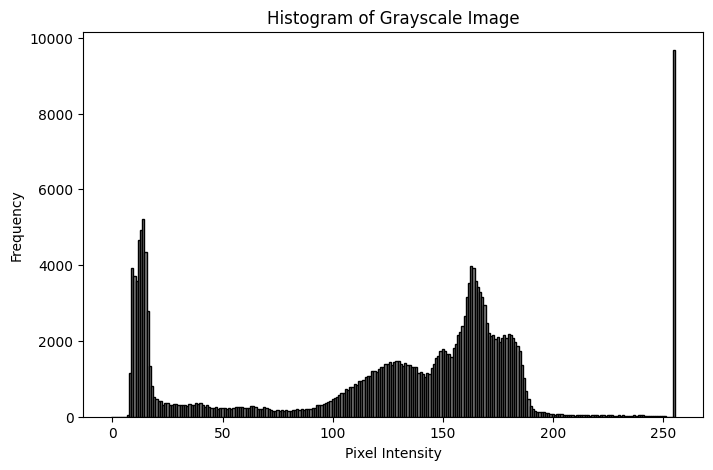

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image = cv2.imread('thr.png', 0)  # Replace 'image.png' with your file

# Calculate histogram using NumPy
hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.bar(bins[:-1], hist, width=1, color='gray', edgecolor='black')
plt.show()

# **Histogram of Color Image**

The zip function is used to iterate over both the channels (R, G, B) and the colors (red, green, blue) simultaneously. This allows you to process each channel and assign the corresponding color for plotting.

**channel.flatten()** flattens the 2D array of pixel values (height x width) of each color channel into a 1D array. This is necessary for computing the histogram.

**bins[:-1]:** This slices the bins array to exclude the last element (the rightmost boundary, 256 in this case).

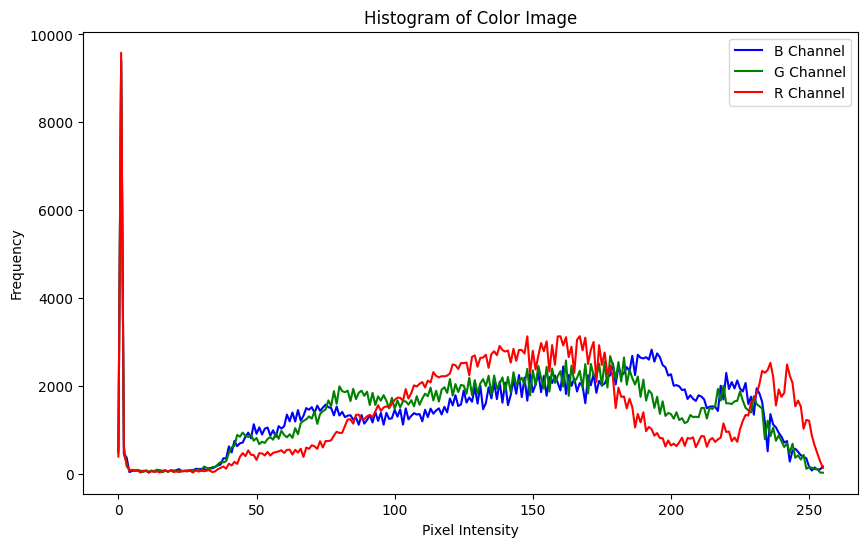

In [27]:
# Load a color image
color_image = cv2.imread('eye.jpg')  # Replace with your file

# Split the image into its R, G, and B channels
channels = cv2.split(color_image)
colors = ('b', 'g', 'r')  # Corresponding channel colors

# Plot histograms for each channel
plt.figure(figsize=(10, 6))
plt.title("Histogram of Color Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

for channel, color in zip(channels, colors):
    hist, bins = np.histogram(channel.flatten(), bins=256, range=[0, 256])
    plt.plot(bins[:-1], hist, color=color, label=f'{color.upper()} Channel')

plt.legend()
plt.show()


# **Histogram Equalization**

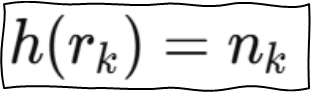

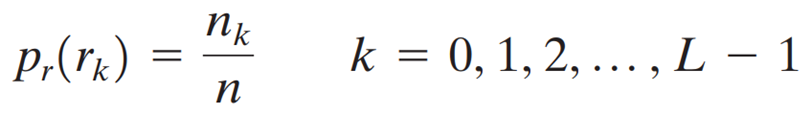

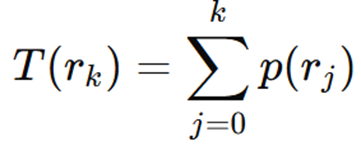

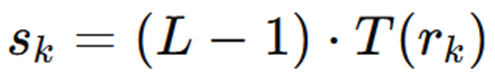

**cv2.calcHist():** This function is used to compute the histogram of an image, where the histogram is the distribution of pixel intensities (values) across the image.

**[0]:** This specifies the index of the channel you want to compute the histogram for. In a grayscale image, there's only one channel (index 0). For a color image, this would typically be 0 for blue, 1 for green, or 2 for red. Since we're working with a grayscale image, it is set to 0.

**None:** This parameter represents a mask. If you don't want to apply a mask (i.e., to calculate the histogram for the entire image), you pass None.

**[256]:** This specifies the number of bins for the histogram. Here, you're using 256 bins, which means you're dividing the pixel intensity values into 256 intervals (0–255) for an 8-bit grayscale image.

**[0, 256]:** This specifies the range of pixel values that should be considered in the histogram. You're using the full range of pixel values (0 to 255).

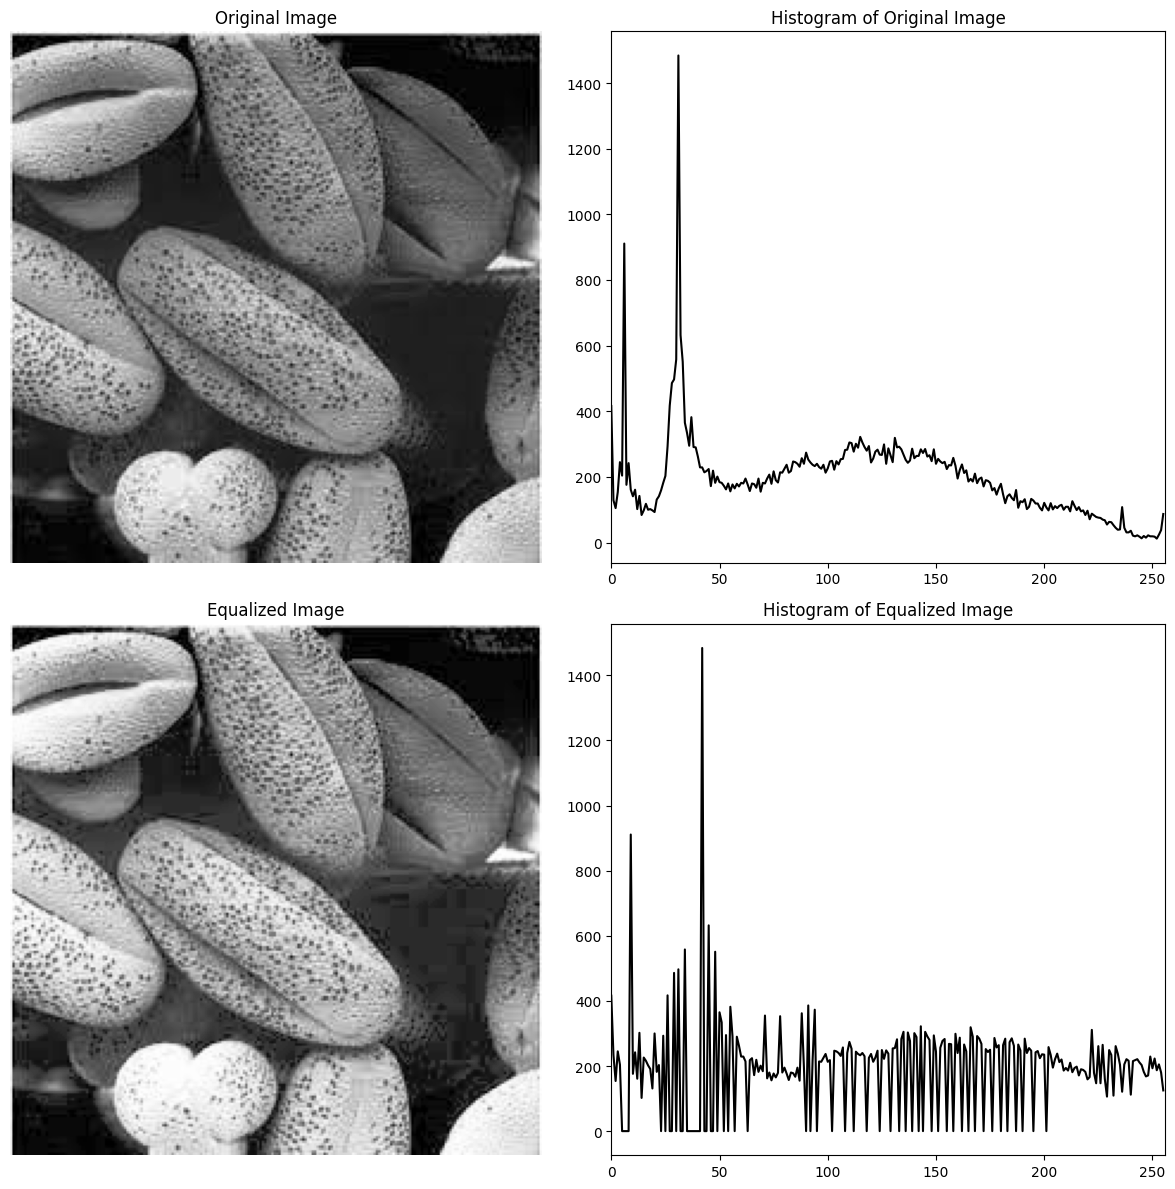

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('bean.jpeg', 0)  # Replace 'image.png' with your image file

# Perform Histogram Equalization using OpenCV function
equalized_image = cv2.equalizeHist(image)

# Calculate histograms for both images
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot the original and equalized images and their histograms
plt.figure(figsize=(12, 12))

# Plot the original image and its histogram
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Histogram of Original Image")
plt.plot(hist_original, color='black')
plt.xlim([0, 256])

# Plot the equalized image and its histogram
plt.subplot(2, 2, 3)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram of Equalized Image")
plt.plot(hist_equalized, color='black')
plt.xlim([0, 256])

# Show the results
plt.tight_layout()
plt.show()

# **Histogram Matching**

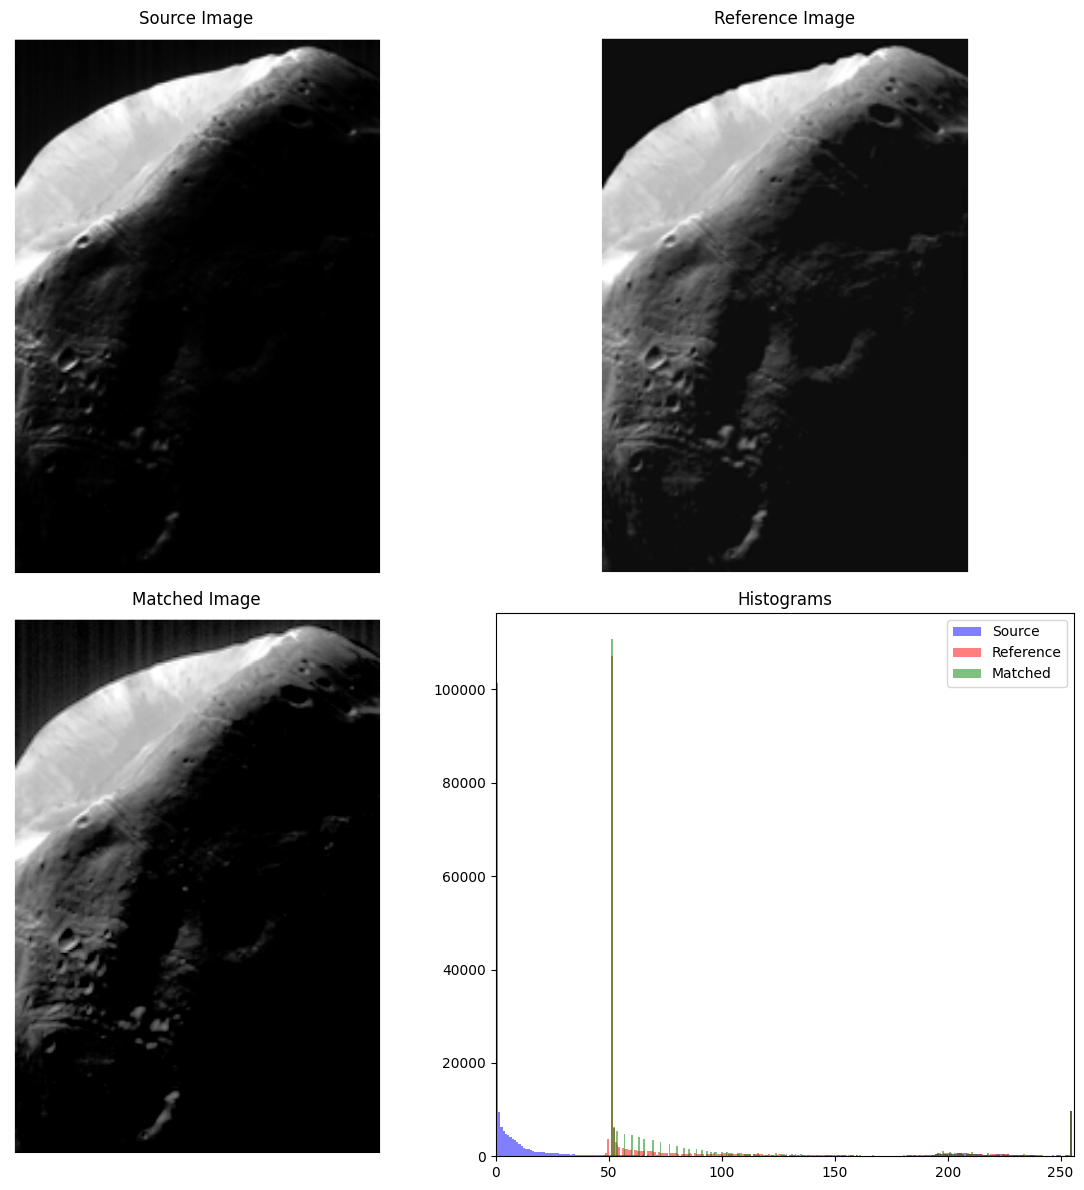

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_cdf(hist):
    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()  # Cumulative sum of the histogram
    cdf_normalized = cdf / cdf[-1]  # Normalize the CDF to [0, 1]
    return cdf_normalized

def histogram_matching(source, reference):
    # Calculate histograms
    hist_source = cv2.calcHist([source], [0], None, [256], [0, 256])
    hist_reference = cv2.calcHist([reference], [0], None, [256], [0, 256])

    # Calculate the CDF for source and reference histograms
    cdf_source = calculate_cdf(hist_source)
    cdf_reference = calculate_cdf(hist_reference)

    # Create a lookup table to match the histograms
    mapping = np.zeros(256, dtype=np.uint8)

    # For each pixel in the source image, find the closest match in the reference CDF
    g = 0  # Initialize reference pixel index
    for s in range(256):
        while g < 256 and cdf_reference[g] < cdf_source[s]: #g < 256: Ensures that g does not exceed the maximum intensity value of 255.
            g += 1 # If g = 3, after g += 1, g will become 4.
        mapping[s] = g

    # Apply the transformation
    matched_image = mapping[source]

    return matched_image

# Load the source and reference images
source_image = cv2.imread('source.png', 0)  # Replace with the source image path
reference_image = cv2.imread('ref.png', 0)  # Replace with the reference image path

# Perform histogram matching
matched_image = histogram_matching(source_image, reference_image)

# Plot the images and histograms
plt.figure(figsize=(12, 12))

# Source Image
plt.subplot(2, 2, 1)
plt.title("Source Image")
plt.imshow(source_image, cmap='gray')
plt.axis('off')

# Reference Image
plt.subplot(2, 2, 2)
plt.title("Reference Image")
plt.imshow(reference_image, cmap='gray')
plt.axis('off')

# Matched Image
plt.subplot(2, 2, 3)
plt.title("Matched Image")
plt.imshow(matched_image, cmap='gray')
plt.axis('off')

# Plot histograms
plt.subplot(2, 2, 4)
plt.title("Histograms")
plt.hist(source_image.ravel(), bins=256, color='blue', alpha=0.5, label="Source")
plt.hist(reference_image.ravel(), bins=256, color='red', alpha=0.5, label="Reference")
plt.hist(matched_image.ravel(), bins=256, color='green', alpha=0.5, label="Matched")
plt.legend(loc='upper right')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()
